# Exploratory Data Analysis

### We will perform the EDA on **Telco** Customer Churn datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Telco Customer Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning and Preprocessing

First we need to replace missing values in **TotalCharges** column with 0 and then we need to convert its datatype from object to float64.

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Checking if there are NULL Values in any column

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Descriptive Statistics for our Dataset

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# Checking for Duplicates Value in Dataset

df["customerID"].duplicated().sum()

np.int64(0)

In **SeniorCitizen** column, we are given with 0 and 1 as true or false. We will replace it with Yes or No for our convenience. We weill create a function **conv()** to perform this action.

In [9]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Now we want to check how many customers have churned?

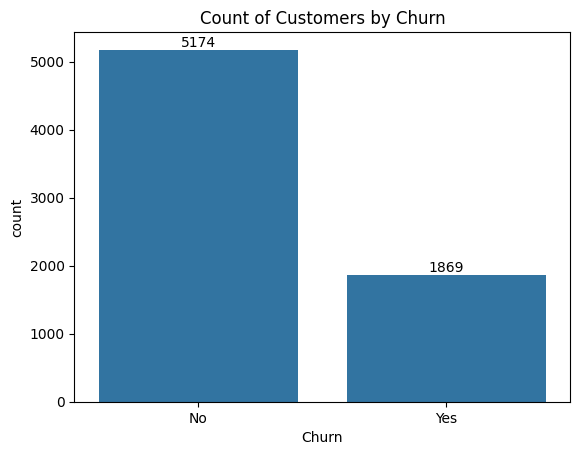

In [11]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

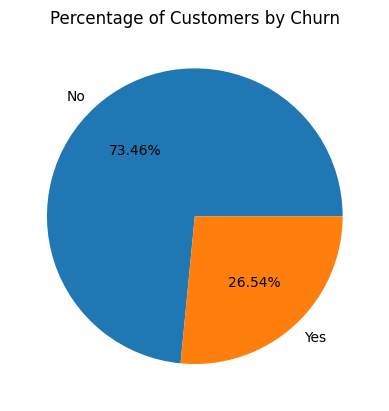

In [13]:
gb = df.groupby("Churn").agg({"Churn": "count"})

plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Customers by Churn")
plt.show()

### So we can see that **1869** customers which is **26.54%** of total have churned.

## Let's now Explore the Reasons behind this Churn of Customers

### Let's Explore if Gender of Customer have any Effect on Churn

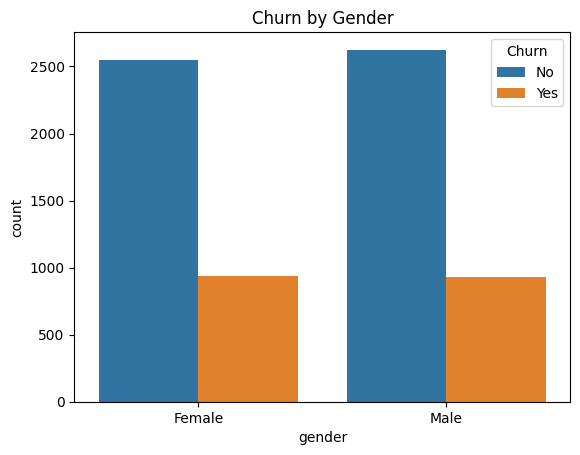

In [16]:
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

### So we can see that Churn is same for both genders so it means Gender is not related to Churn

## Let's see if Senior Citizens have any effect on Churn

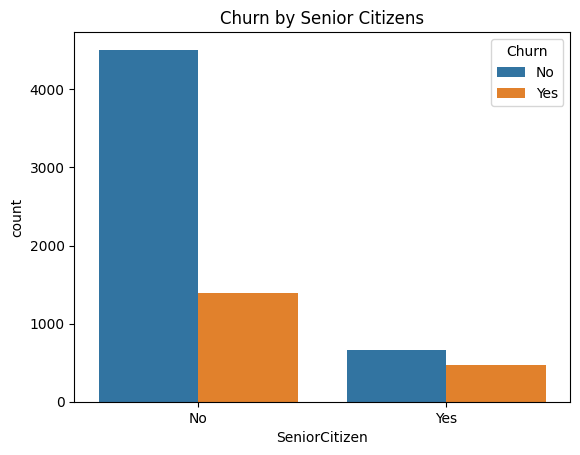

In [19]:
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by Senior Citizens")
plt.show()

### We can see here that a large percentage of Senior Citizens have Churned as compared to others.

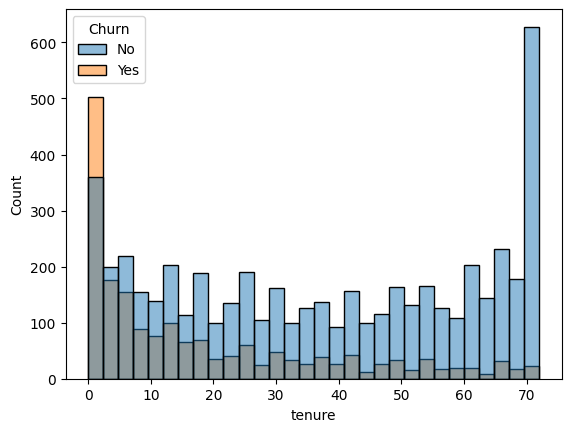

In [23]:
sns.histplot(x = "tenure", data = df, bins = 30, hue = "Churn")
plt.show()

### So apparently those Customers who used Telco services for a long tenure remains while those who used services for short period of time ie. 1 or 2 moths have Churned out.

## Let's now Explore the if Contract has any effect on Churn

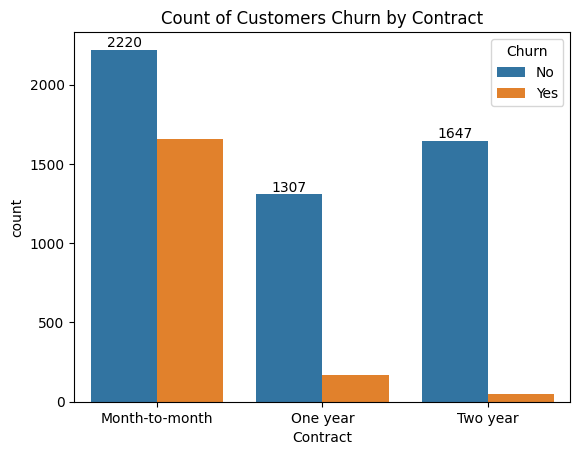

In [27]:
ax = sns.countplot(x = 'Contract', data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers Churn by Contract")
plt.show()

### So Customers with Short-period Contract have higher Churn Count.

## Let's Check the relation b/w Churn and Some other Columns of Data

In [29]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

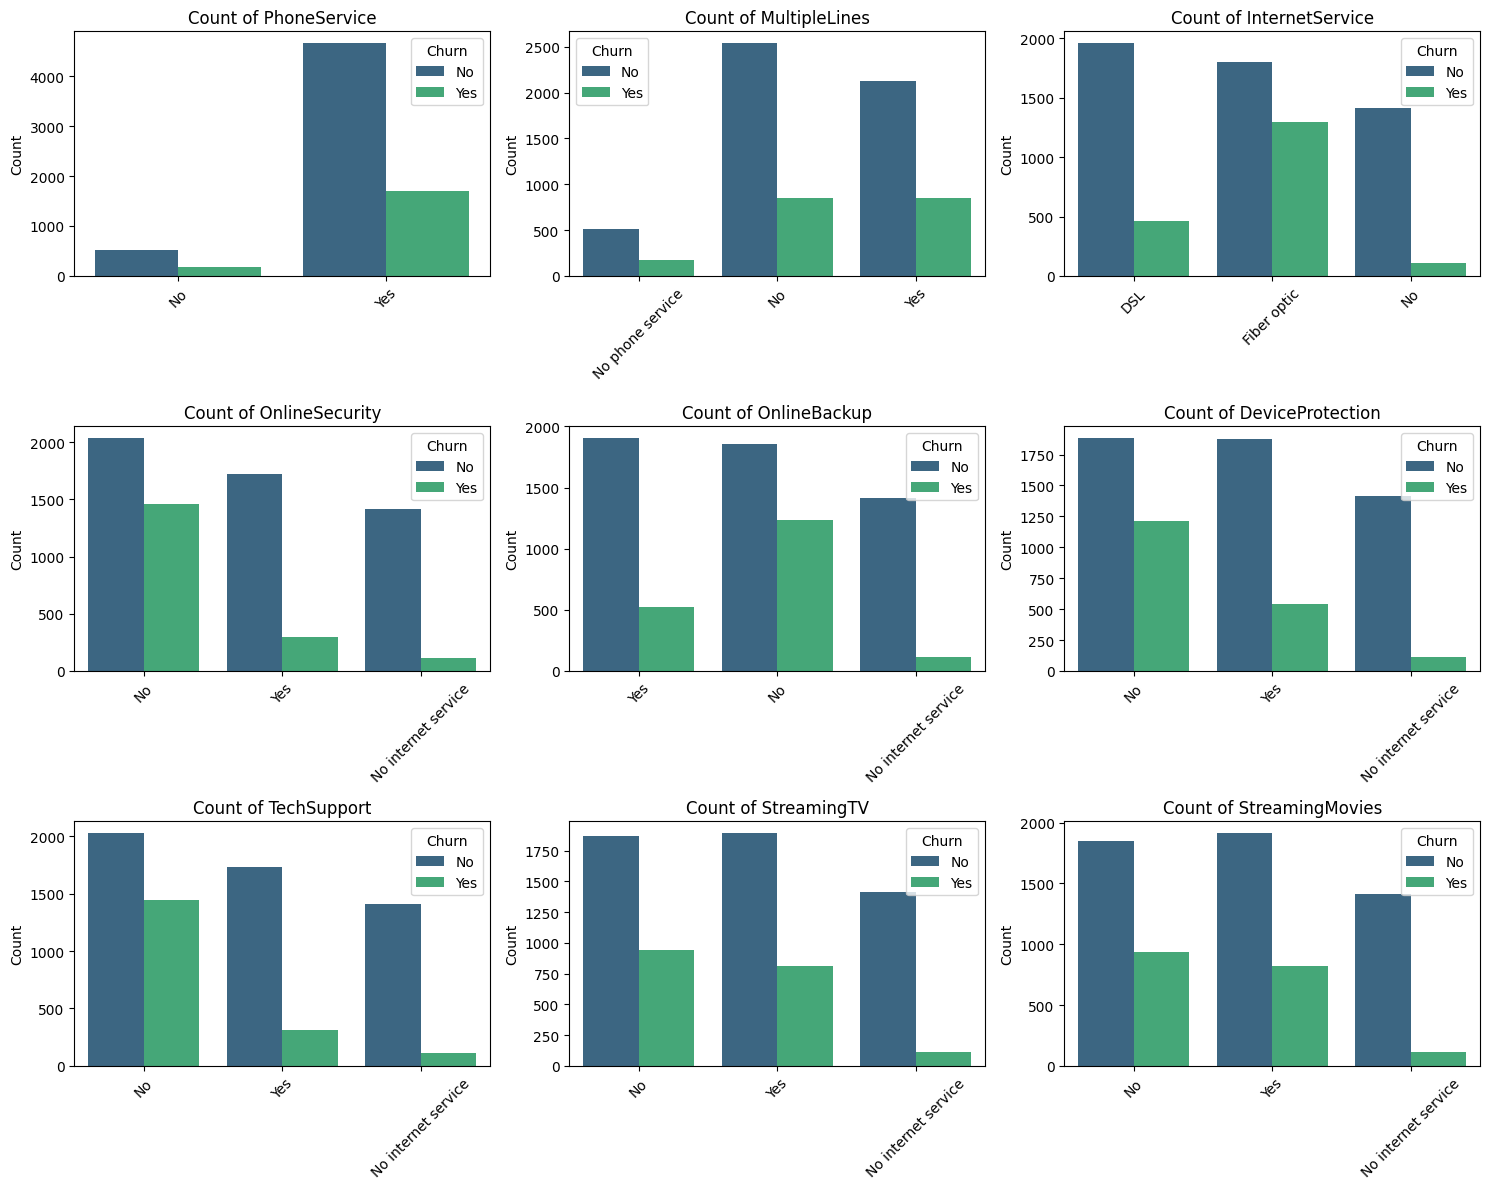

In [31]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate countplots
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="viridis", hue = df["Churn"])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels if needed

# Adjust layout
plt.tight_layout()
plt.show()

The countplots show that most customers have PhoneService and InternetService, with Fiber Optic users experiencing higher churn. Customers without OnlineSecurity, OnlineBackup, TechSupport, or DeviceProtection tend to churn more, indicating these services may help retention. MultipleLines users have a slightly higher churn rate than single-line users. Streaming services (TV & Movies) show mixed effects, but those without them tend to churn more. Overall, customers with fewer additional services are more likely to leave, suggesting that bundling more services could reduce churn.

## Let's Explore if Payment Methods have any effect on Churn

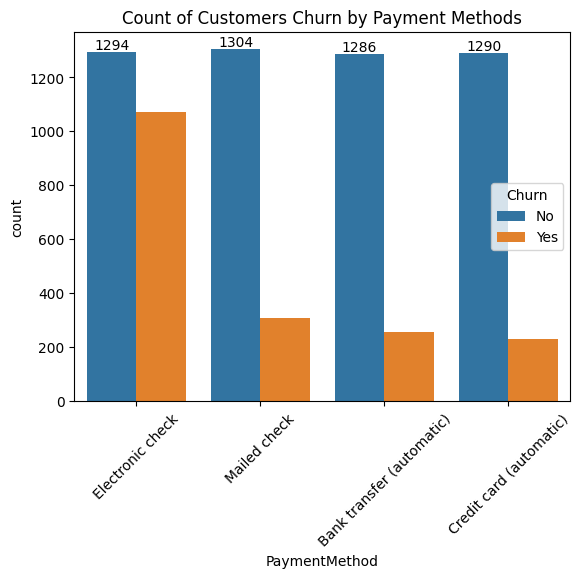

In [33]:
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers Churn by Payment Methods")
plt.xticks(rotation = 45)
plt.show()

### So we can see that Customers who opted for Electronic Check have immensily high Churn rate as compared to others.